# Import Modules


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Data Reading

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/selvinfurtado01/schulich_data_science/refs/heads/main/Customer_Data.csv')
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


# Data Preprocessing

In [3]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Here it is observed that there are 313 null values observed in the 'MINIMUM_PAYMENTS' column
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
# In order to address this problem, we can drop these values for the following reasons:
# 1. There are 313 missing values from the dataset of 8950 values which accounts for only 3.5% of the data for that column
#   Hence, these missing values can be dropped as they are not significant and will not impact the overall data
# 2. 'MINIMUM_PAYMENTS' column is a the minimum credit card balance payment to be made by the customer these values are calculated using 
#   different metrics and it is difficult to replicate without understanding said procedure. Hence we have concluded to drop these values
#   to better resolve this issue.

df.dropna(inplace = True)

In [7]:
# Verifying if the missing values in the 'MINIMUM_PAYMENTS' column have been dropped
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHASES_T

In [9]:
# Describing the data
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [10]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [11]:
# Understanding the different Dataframe Columns:
# CUST_ID: Unique identifier for each customer.
# BALANCE: The current balance on the customer’s credit card.
# BALANCE_FREQUENCY: The frequency at which the balance is updated, ranging from 0 (no update) to 1 (frequently updated).
# PURCHASES: The total amount spent by the customer on purchases.
# ONEOFF_PURCHASES: The amount spent by the customer on one-time purchases (non-recurring).
# INSTALLMENTS_PURCHASES: The amount spent on purchases paid in installments.
# CASH_ADVANCE: The amount of cash borrowed on the credit card (cash advances).
# PURCHASES_FREQUENCY: Frequency of any purchase activity, ranging from 0 (no purchases) to 1 (frequent purchases).
# ONEOFF_PURCHASES_FREQUENCY: Frequency of one-off purchase activities.
# PURCHASES_INSTALLMENTS_FREQUENCY: Frequency of installment-based purchase activities.
# CASH_ADVANCE_FREQUENCY: Frequency of cash advances, ranging from 0 (no cash advances) to 1 (frequent cash advances).
# CASH_ADVANCE_TRX: The number of transactions where cash advances were taken.
# PURCHASES_TRX: The number of purchase transactions made by the customer.
# CREDIT_LIMIT: The credit limit assigned to the customer’s credit card.
# PAYMENTS: The total payments made by the customer towards the credit card balance.
# MINIMUM_PAYMENTS: The minimum amount the customer is required to pay on their balance.
# PRC_FULL_PAYMENT: The percentage of months where the customer paid the full balance.
# TENURE: The number of months the customer has been using the credit card.

In [12]:
# The different columns having values that range between 0-1
# BALANCE_FREQUENCY
# PURCHASES_FREQUENCY
# ONEOFF_PURCHASES_FREQUENCY
# PURCHASES_INSTALLMENTS_FREQUENCY
# CASH_ADVANCE_FREQUENCY
# PRC_FULL_PAYMENT

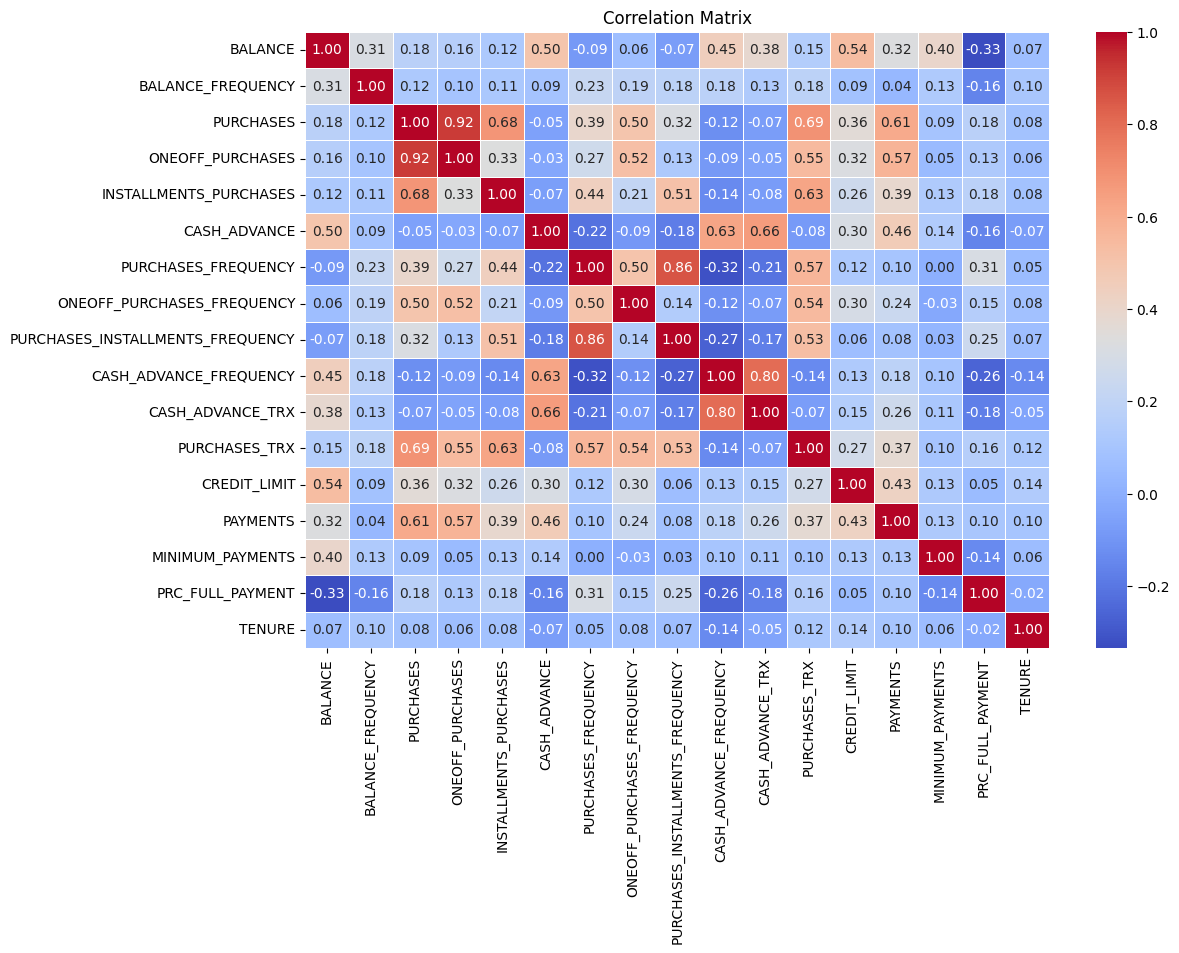

In [13]:
# Plotting the correlation matrix to understand the relationship between the different independent variables

# Calculate the correlation matrix
num_col_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = num_col_df.corr()

# Plot Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [14]:
# Banks use 'PAYMENTS' and 'MINIMUM_PAYMENTS' to understand spending habits of customers which could be insightful while creating or 
# promoting future products as well as catering products based on their behaviour. 
# This can also help to assign credit limit balance and under risky and stable spending behaviours of customers   
df[['PAYMENTS','MINIMUM_PAYMENTS']].describe()

,PAYMENTS,MINIMUM_PAYMENTS
count,8636.000000,8636.000000
mean,1784.478099,864.304943
std,2909.810090,2372.566350
min,0.049513,0.019163
25%,418.559237,169.163545
50%,896.675701,312.452292
75%,1951.142090,825.496463
max,50721.483360,76406.207520


In [15]:
# Using 'PAYMENTS' and 'MINIMUM_PAYMENTS' to calculate the difference and understand the customer behaviour which is scaled between 0-1 
# this helps us understand the relationship between the two columns and analyze payment behaviour 

def payment_behaviour_scaled(row):
    # Calculate the difference between the two columns
    diff = row['PAYMENTS'] - row['MINIMUM_PAYMENTS']
    
    # Scale the difference to a range between 0 and 1 using a sigmoid-like function
    scaling_factor = 2000
    payment_behavior_score = 1 / (1 + np.exp(-diff / scaling_factor))
    return payment_behavior_score

# Create a new column for payment behaviour
df['PAYMENT_BEHAVIOR'] = df.apply(payment_behaviour_scaled, axis=1)

# Display new column
df[['PAYMENTS', 'MINIMUM_PAYMENTS', 'PAYMENT_BEHAVIOR']]

,PAYMENTS,MINIMUM_PAYMENTS,PAYMENT_BEHAVIOR
0,201.802084,139.509787,0.507786
1,4103.032597,1072.340217,0.819852
2,622.066742,627.284787,0.499348
4,678.334763,244.791237,0.553982
5,1400.057770,2407.246035,0.376696
...,...,...,...
8943,58.644883,43.473717,0.501896
8945,325.594462,48.886365,0.534533
8947,81.270775,82.418369,0.499857
8948,52.549959,55.755628,0.499599


In [16]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'PAYMENT_BEHAVIOR'],
      dtype='object')

In [17]:
# The 'CREDIT_LIMIT' and 'BALANCE' can be used to calculate the utilization ratio which is very important aspect pertaining to credit cards 
# and is vital information used by banks to understand customer credit card spending behaviours and track balances of individuals
df[['CREDIT_LIMIT', 'BALANCE']].describe()

,CREDIT_LIMIT,BALANCE
count,8636.000000,8636.000000
mean,4522.091030,1601.224893
std,3659.240379,2095.571300
min,50.000000,0.000000
25%,1600.000000,148.095189
50%,3000.000000,916.855459
75%,6500.000000,2105.195853
max,30000.000000,19043.138560


In [18]:
# The 'CREDIT_LIMIT' and 'BALANCE' is used to calculate the utilization ratio by dividing balance by credit limit 
def utilization_ratio(row):
    if row['BALANCE'] >= row['CREDIT_LIMIT']:
        util_ratio = 1
    else:
        util_ratio = row['BALANCE'] / row['CREDIT_LIMIT']
    return util_ratio

# Create a new column for utilization ratio based on 'CREDIT_LIMIT' and 'BALANCE'
df['UTILIZATION_RATIO'] = df.apply(utilization_ratio, axis=1)

# Display new column
df[['BALANCE', 'CREDIT_LIMIT', 'UTILIZATION_RATIO']]

,BALANCE,CREDIT_LIMIT,UTILIZATION_RATIO
0,40.900749,1000.0,0.040901
1,3202.467416,7000.0,0.457495
2,2495.148862,7500.0,0.332687
4,817.714335,1200.0,0.681429
5,1809.828751,1800.0,1.000000
...,...,...,...
8943,5.871712,500.0,0.011743
8945,28.493517,1000.0,0.028494
8947,23.398673,1000.0,0.023399
8948,13.457564,500.0,0.026915


In [19]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'PAYMENT_BEHAVIOR',
       'UTILIZATION_RATIO'],
      dtype='object')

In [20]:
# 'PURCHASES' is a combination of 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE' which calculates a customer total puchase 
# amount and can track the customers spending habits and analyze this data based on spending behaviour.  
df[['PURCHASES', 'ONEOFF_PURCHASES']].describe()

,PURCHASES,ONEOFF_PURCHASES
count,8636.000000,8636.000000
mean,1025.433874,604.901438
std,2167.107984,1684.307803
min,0.000000,0.000000
25%,43.367500,0.000000
50%,375.405000,44.995000
75%,1145.980000,599.100000
max,49039.570000,40761.250000


In [21]:
# Here, the ratio of 'ONEOFF_PURCHASES' and 'PURCHASES' is used to understand impulse spending behaviour and mapped to a range of 0-1
def spending_ratio(row):
    if row['PURCHASES'] == 0:
        spend_ratio = 0
    elif row['ONEOFF_PURCHASES'] >= row['PURCHASES']:
        spend_ratio = 1
    else:
        spend_ratio = row['ONEOFF_PURCHASES'] / row['PURCHASES']
    return spend_ratio

# Create a new column for utilization ratio based on 'ONEOFF_PURCHASES' and 'PURCHASES'
df['SPEND_RATIO'] = df.apply(spending_ratio, axis=1)

# Display new column
df[['ONEOFF_PURCHASES', 'PURCHASES', 'SPEND_RATIO']]

,ONEOFF_PURCHASES,PURCHASES,SPEND_RATIO
0,0.00,95.40,0.0
1,0.00,0.00,0.0
2,773.17,773.17,1.0
4,16.00,16.00,1.0
5,0.00,1333.28,0.0
...,...,...,...
8943,20.90,20.90,1.0
8945,0.00,291.12,0.0
8947,0.00,144.40,0.0
8948,0.00,0.00,0.0


In [22]:
df[['ONEOFF_PURCHASES', 'PURCHASES', 'SPEND_RATIO']].describe()

,ONEOFF_PURCHASES,PURCHASES,SPEND_RATIO
count,8636.000000,8636.000000,8636.000000
mean,604.901438,1025.433874,0.380443
std,1684.307803,2167.107984,0.424327
min,0.000000,0.000000,0.000000
25%,0.000000,43.367500,0.000000
50%,44.995000,375.405000,0.120507
75%,599.100000,1145.980000,0.869388
max,40761.250000,49039.570000,1.000000


# EDA

In [23]:
df['MINIMUM_PAYMENTS'].describe()

count     8636.000000
mean       864.304943
std       2372.566350
min          0.019163
25%        169.163545
50%        312.452292
75%        825.496463
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [24]:
df[df['MINIMUM_PAYMENTS'] > 1750]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PAYMENT_BEHAVIOR,UTILIZATION_RATIO,SPEND_RATIO
5,C10006,1809.828751,1.000000,1333.28,0.0,1333.28,0.000000,0.666667,0.000000,0.583333,...,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0.376696,1.000000,0.000000
10,C10011,1293.124939,1.000000,920.12,0.0,920.12,0.000000,1.000000,0.000000,1.000000,...,0,12,1200.0,1083.301007,2172.697765,0.000000,12,0.367095,1.000000,0.000000
15,C10016,6886.213231,1.000000,1611.70,0.0,1611.70,2301.491267,0.500000,0.000000,0.500000,...,4,11,8000.0,1993.439277,2109.906490,0.000000,12,0.485446,0.860777,0.000000
19,C10020,3577.970933,1.000000,398.64,0.0,398.64,0.000000,1.000000,0.000000,1.000000,...,0,12,4000.0,1053.980464,12465.549380,0.000000,12,0.003316,0.894493,0.000000
20,C10021,2016.684686,1.000000,176.68,0.0,176.68,0.000000,0.666667,0.000000,0.666667,...,0,8,2000.0,223.068600,13557.297260,0.000000,12,0.001270,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8724,C18961,3002.791004,1.000000,2463.00,2463.0,0.00,797.158950,0.166667,0.166667,0.000000,...,3,3,3000.0,431.716492,16638.733850,0.000000,12,0.000302,1.000000,1.000000
8754,C18993,455.471255,1.000000,389.70,44.7,345.00,276.902382,1.000000,0.083333,0.916667,...,4,14,1000.0,48.594194,3644.171310,0.090909,12,0.142120,0.455471,0.114704
8840,C19081,2588.410789,0.888889,787.40,0.0,787.40,3762.650329,0.777778,0.000000,0.666667,...,10,17,3000.0,1739.406636,1769.001229,0.000000,9,0.496301,0.862804,0.000000
8873,C19114,1023.883008,1.000000,585.84,0.0,585.84,956.849209,1.000000,0.000000,0.875000,...,2,22,1000.0,212.105443,2789.590897,0.000000,8,0.216066,1.000000,0.000000


<Axes: xlabel='MINIMUM_PAYMENTS', ylabel='Count'>

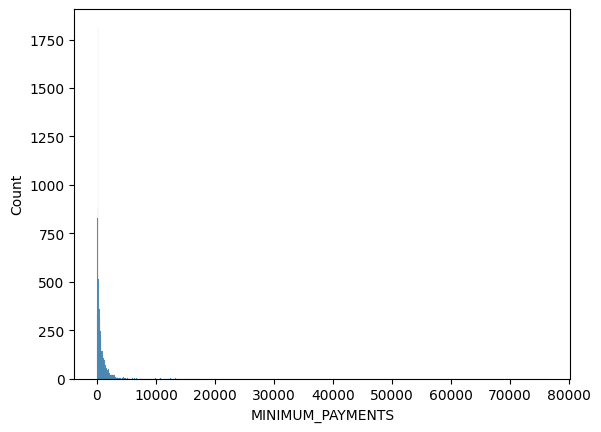

In [25]:
sns.histplot(df['MINIMUM_PAYMENTS'])

In [26]:
df['BALANCE'].describe()

count     8636.000000
mean      1601.224893
std       2095.571300
min          0.000000
25%        148.095189
50%        916.855459
75%       2105.195853
max      19043.138560
Name: BALANCE, dtype: float64

<Axes: xlabel='BALANCE', ylabel='Count'>

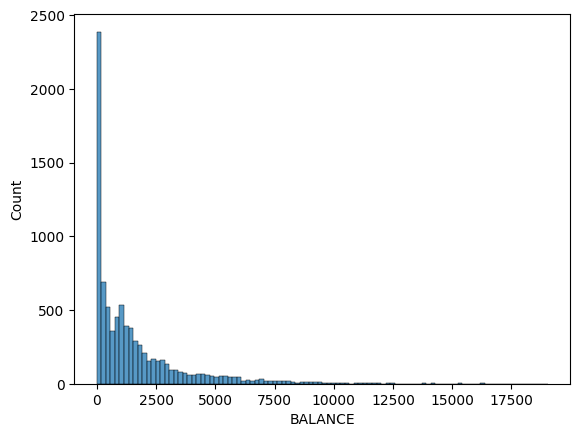

In [27]:
sns.histplot(df['BALANCE'])

In [28]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'PAYMENT_BEHAVIOR',
       'UTILIZATION_RATIO', 'SPEND_RATIO'],
      dtype='object')

In [29]:
# Relationships
# 1. Understand if people are making complete payments based on their minimum payments assigned
# 2. How does one off payments and one off payments frequency effect the customer balance
# 3. What are the different parameters affecting the balance: one-off purchases, installments, cash advances, credit limit
# 4. How does tenure affect the credit limit and balance of the user
# 5. Purchases vs Balance compare if there are outstanding payments of users

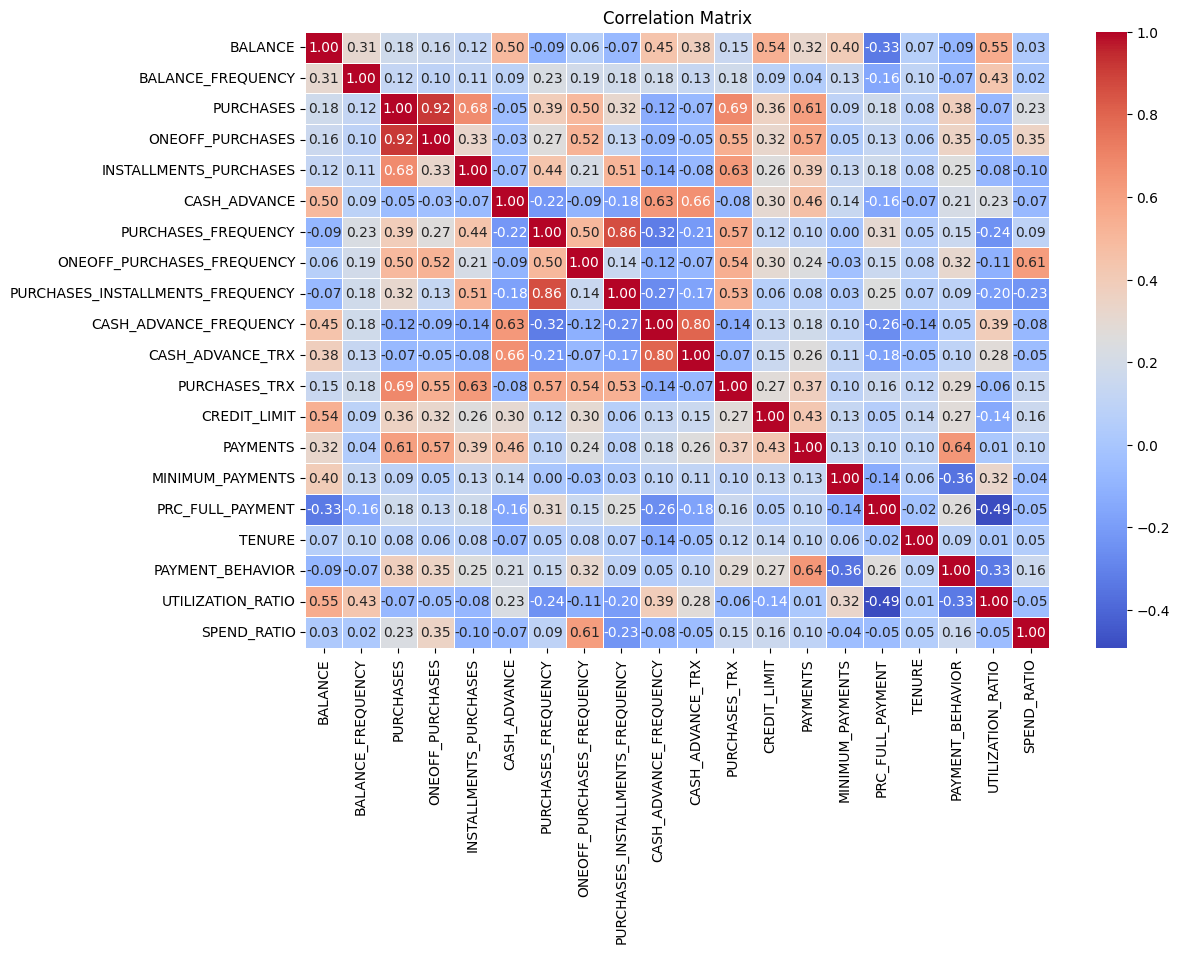

In [30]:
# Plotting the correlation matrix to understand the relationship between the different independent variables

# Calculate the correlation matrix
num_col_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = num_col_df.corr()

# Plot Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()